In [1]:
import pandas as pd
import torch

In [2]:
import torch.nn as nn
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('NYCTaxiFares.csv')

In [5]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1
...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1


In [6]:
df.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [8]:
def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c)
    return d

In [9]:
df['kilometers']=haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilometers
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [10]:
df['EDTTime']=pd.to_datetime(df['pickup_datetime'].str[:19])-pd.Timedelta(hours=4)

In [11]:
df['Hour']=df['EDTTime'].dt.hour

In [12]:
df['Hour']

0          4
1         11
2          7
3         17
4         22
          ..
119995    10
119996     6
119997    14
119998     4
119999    12
Name: Hour, Length: 120000, dtype: int64

In [13]:
df['AmOrPm']=np.where(df['Hour']>12,'pm','am')

In [14]:
df['AmOrPm']

0         am
1         am
2         am
3         pm
4         pm
          ..
119995    am
119996    am
119997    pm
119998    am
119999    am
Name: AmOrPm, Length: 120000, dtype: object

In [15]:
df['Weekday']=df['EDTTime'].dt.dayofweek

In [16]:
df['Weekday']

0         0
1         5
2         5
3         6
4         4
         ..
119995    6
119996    4
119997    6
119998    1
119999    5
Name: Weekday, Length: 120000, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   pickup_datetime    120000 non-null  object        
 1   fare_amount        120000 non-null  float64       
 2   fare_class         120000 non-null  int64         
 3   pickup_longitude   120000 non-null  float64       
 4   pickup_latitude    120000 non-null  float64       
 5   dropoff_longitude  120000 non-null  float64       
 6   dropoff_latitude   120000 non-null  float64       
 7   passenger_count    120000 non-null  int64         
 8   kilometers         120000 non-null  float64       
 9   EDTTime            120000 non-null  datetime64[ns]
 10  Hour               120000 non-null  int64         
 11  AmOrPm             120000 non-null  object        
 12  Weekday            120000 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(4), 

In [18]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,kilometers,EDTTime,Hour,AmOrPm,Weekday
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,am,0
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,am,5
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,am,5
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,pm,6
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,pm,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,5.751348,2010-04-18 10:33:03,10,am,6
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,5.767444,2010-04-23 06:27:48,6,am,4
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,5.052523,2010-04-18 14:50:40,14,pm,6
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,1.208923,2010-04-13 04:14:44,4,am,1


In [19]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'kilometers', 'EDTTime', 'Hour', 'AmOrPm',
       'Weekday'],
      dtype='object')

In [20]:
cont_cols=['Weekday','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','kilometers']
cat_cols=['AmOrPm','Hour']
y_col=['fare_amount']


In [21]:
for cols in cat_cols:
    df[cols]=df[cols].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   pickup_datetime    120000 non-null  object        
 1   fare_amount        120000 non-null  float64       
 2   fare_class         120000 non-null  int64         
 3   pickup_longitude   120000 non-null  float64       
 4   pickup_latitude    120000 non-null  float64       
 5   dropoff_longitude  120000 non-null  float64       
 6   dropoff_latitude   120000 non-null  float64       
 7   passenger_count    120000 non-null  int64         
 8   kilometers         120000 non-null  float64       
 9   EDTTime            120000 non-null  datetime64[ns]
 10  Hour               120000 non-null  category      
 11  AmOrPm             120000 non-null  category      
 12  Weekday            120000 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(6

In [23]:
df['AmOrPm'].cat.categories

Index(['am', 'pm'], dtype='object')

In [24]:
df['AmOrPm'].cat.codes

0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    0
Length: 120000, dtype: int8

In [25]:
hr=df['Hour'].cat.codes
ampm=df['AmOrPm'].cat.codes

In [26]:
catp=np.stack([hr,ampm],axis=1)

In [27]:
catp

array([[ 4,  0],
       [11,  0],
       [ 7,  0],
       ...,
       [14,  1],
       [ 4,  0],
       [12,  0]], dtype=int8)

In [28]:
cats=torch.tensor(catp,dtype=torch.int64)

In [29]:
cats

tensor([[ 4,  0],
        [11,  0],
        [ 7,  0],
        ...,
        [14,  1],
        [ 4,  0],
        [12,  0]])

In [30]:
conts=np.stack([df[cols].values for cols in cont_cols],1)

In [31]:
conts=torch.tensor(conts,dtype=torch.float64)

In [32]:
conts

tensor([[  0.0000,   1.0000, -73.9924,  ..., -73.9755,  40.7447,   2.1263],
        [  5.0000,   1.0000, -73.9901,  ..., -73.9742,  40.7441,   1.3923],
        [  5.0000,   2.0000, -73.9941,  ..., -73.9601,  40.7662,   3.3268],
        ...,
        [  6.0000,   3.0000, -73.9886,  ..., -74.0115,  40.7078,   5.0525],
        [  1.0000,   1.0000, -74.0044,  ..., -73.9927,  40.7308,   1.2089],
        [  5.0000,   3.0000, -73.9554,  ..., -73.9676,  40.7630,   1.4274]],
       dtype=torch.float64)

In [33]:
y_col=torch.tensor(df['fare_amount'].values,dtype=torch.float64)

In [34]:
y_col=y_col.reshape(-1,1)

In [60]:
y_col.shape

torch.Size([120000, 1])

In [36]:
cat_cols=['Hour','AmOrPm']
cat_szs=[len(df[cols].cat.categories) for cols in cat_cols]

In [37]:
cat_szs=[(size,min(50,size//2)) for size in cat_szs]

In [38]:
cat_szs

[(24, 12), (2, 1)]

In [39]:
selfembed=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in cat_szs])

In [40]:
selfembed

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
)

In [41]:
catz=cats[:4]

In [42]:
catz

tensor([[ 4,  0],
        [11,  0],
        [ 7,  0],
        [17,  1]])

In [43]:
catz[:,0]

tensor([ 4, 11,  7, 17])

In [44]:
embeddings=[]
for i,e in enumerate(selfembed):
    embeddings.append(e(catz[:,i]))

    

In [45]:
embeddings=torch.cat(embeddings,1)

In [46]:
embeddings

tensor([[-0.4604,  2.4915, -0.0590,  0.1466, -0.3288, -0.3542,  1.7112,  0.6214,
         -0.0598,  0.4471,  2.1963, -1.5367,  1.8781],
        [ 0.7865, -0.4470, -1.4967,  0.0435,  1.5830, -1.8413, -1.1149,  1.1063,
         -2.0646, -0.0920,  0.5053, -1.5739,  1.8781],
        [-0.9569,  0.5571, -0.9079, -0.6436,  0.5474, -0.0359,  1.3155,  0.9057,
          0.2631, -1.2038, -0.8281,  0.5353,  1.8781],
        [ 0.5944,  0.7781, -0.6770,  0.3261, -0.8673, -1.3257,  0.7668, -0.4092,
         -0.5617,  0.2552,  2.8133,  0.2435, -0.6970]], grad_fn=<CatBackward>)

In [47]:
selfembeddrop=nn.Dropout(0.4)

In [48]:
z=selfembeddrop(embeddings)

In [49]:
z

tensor([[-0.0000,  4.1526, -0.0000,  0.2444, -0.5480, -0.5904,  2.8520,  0.0000,
         -0.0997,  0.7452,  3.6606, -2.5611,  0.0000],
        [ 1.3109, -0.7451, -2.4944,  0.0725,  2.6383, -3.0689, -0.0000,  1.8438,
         -3.4410, -0.1533,  0.8421, -0.0000,  3.1301],
        [-0.0000,  0.9285, -0.0000, -1.0727,  0.0000, -0.0000,  2.1925,  0.0000,
          0.4385, -0.0000, -1.3801,  0.8922,  3.1301],
        [ 0.9907,  1.2968, -0.0000,  0.5434, -1.4455, -2.2096,  1.2780, -0.0000,
         -0.0000,  0.0000,  0.0000,  0.4058, -0.0000]], grad_fn=<MulBackward0>)

In [51]:
class Tabular_Model(nn.Module):
    def __init__(self,embed_szs,n_cont,out_szs,layers,p=0.5):
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in embed_szs])
        self.emb_drop=nn.Dropout(p)
        self.bn_cont=nn.BatchNorm1d(n_cont)
        n_emb=sum([nf for (ni,nf) in embed_szs])
        n_in=n_cont+n_emb
        layer_list=[]
        for i in layers:
            layer_list.append(nn.Linear(n_in,i))
            layer_list.append(nn.ReLU(inplace=True))
            layer_list.append(nn.BatchNorm1d(i))
            layer_list.append(nn.Dropout(p))
            n_in=i
        layer_list.append(nn.Linear(layers[-1],out_szs))
        self.layers=nn.Sequential(*layer_list)
        
    def forward(self,x_cat,x_cont):
        Embeddings=[]
        for i,e in enumerate(self.embeds):
            Embeddings.append(e(x_cat[:,i]))
        x=torch.cat(Embeddings,1)
        x=self.emb_drop(x)
        
        x_cont=self.bn_cont(x_cont)
        x=torch.cat([x,x_cont],1)
        x=self.layers(x)
        return x

In [53]:
torch.manual_seed(33)
model=Tabular_Model(cat_szs,conts.shape[1],1,[200,100,],p=0.4)

In [69]:
y_col.dtype

torch.float64

In [54]:
model

Tabular_Model(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=20, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [55]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [56]:
batch_size=60000
test_size=int(0.2*60000)

In [80]:
cat_train=cats[:batch_size-test_size]
cat_test=cats[batch_size-test_size:batch_size]
con_train=conts[:batch_size-test_size]
con_test=conts[batch_size-test_size:batch_size]
y_train=y_col[:batch_size-test_size]
y_test=y_col[batch_size-test_size:batch_size]

In [82]:
losses=[]
epochs=300
for i in range(epochs):
    i+=1
    y_pred=model(cat_train,con_train)
    loss=torch.sqrt(criterion(y_pred,y_train))
    if i%25 == 1:
         print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:   1  loss: 12.60221004
epoch:  26  loss: 10.82136440
epoch:  51  loss: 10.23646545
epoch:  76  loss: 9.83284283
epoch: 101  loss: 9.31489563
epoch: 126  loss: 8.60019398
epoch: 151  loss: 7.61772633
epoch: 176  loss: 6.39027834
epoch: 201  loss: 5.17105389
epoch: 226  loss: 4.24868107
epoch: 251  loss: 3.81871438
epoch: 276  loss: 3.75368524


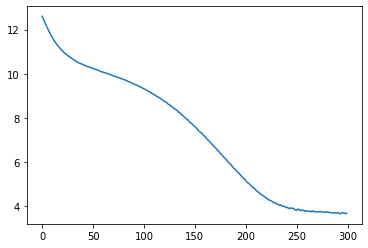

In [84]:
plt.plot(range(epochs),losses)
plt.show()

In [87]:
with torch.no_grad():
    y_pred=model(cat_test,con_test)
    loss=criterion(y_pred,y_test)

In [89]:
print(torch.sqrt(loss))

tensor(3.5914)


In [90]:
torch.save(model,'TaxiFarePrediction.pt')